# Company Credit Risk Prediction

In [2]:
#import libraries
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
#read csv
df = pd.read_csv('IGP_data.csv')
df

,Unnamed: 0,Company name,Credit score,Current ratio (x)\nLast avail. yr,Gearing\nLast avail. yr,Debtor Collection\nLast avail. yr,Turnover\nth GBP Last avail. yr,Profit (Loss) before Taxation\nth GBP Last avail. yr,Net Tangible Assets\nth GBP Last avail. yr,Profit Margin\nLast avail. yr,...,Current Liabilities\nth GBP Last avail. yr,Return on Total Assets\nLast avail. yr,Gross margin\nLast avail. yr,Net Assets Turnover (x)\nLast avail. yr,Liquidity ratio (x)\nLast avail. yr,Credit score date,Likelihood of failure\n%,Credit limit\nGBP,Company status,Profit (Loss) after Tax\nth GBP Last avail. yr
0,1,SHELL PLC,92,1.4,71.91,40.97,"25,36,76,000","2,56,10,000","22,29,93,000",10.1,...,"-7,47,76,000",8.03,NaN,1.04,1.13,25-03-2024,0.9,n.a.,Active,"1,54,13,000"
1,2,BP P.L.C.,92,1.21,134.56,43.13,"16,72,15,000","1,86,41,000","13,48,14,000",11.15,...,"-6,75,65,000",8.47,NaN,1.1,0.94,25-03-2024,0.9,"5,00,00,000",Active,"1,24,64,000"
2,3,GLENCORE ENERGY UK LTD.,85,1.02,n.s.,23.42,"6,09,20,824","1,41,873","2,27,484",0.23,...,"-1,23,23,281",1.13,1.35,267.8,0.89,07-03-2024,0.9,"1,94,58,000",Active,"1,34,529"
3,4,UNILEVER PLC,92,0.76,171.27,24.64,"5,17,49,000","81,08,000","1,06,73,000",15.67,...,"-2,04,09,000",12.41,42.24,1.15,0.54,25-03-2024,0.9,"5,00,00,000",Active,"61,99,000"
4,5,HSBC HOLDINGS PLC,86,0.8,398.56,n.s.,"4,91,45,000","2,38,21,000","74,39,46,000",48.47,...,"-1,63,14,00,000",1,NaN,0.07,0.8,25-03-2024,0.9,"5,00,00,000",Active,"1,92,77,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41661,41662,IFDC LIMITED,89,n.s.,NaN,97.75,175,-376,"1,228",n.s.,...,-11,-30.39,NaN,0.14,n.s.,28-04-2023,0.9,"50,681",Active,-376
41662,41663,PHARMACLIQ LIMITED,38,5,NaN,NaN,175,60,86,34.28,...,-20,56.29,NaN,2.03,5,06-12-2023,4.5,"1,274",Active,49
41663,41664,HOPING FOUNDATION,81,39.38,NaN,NaN,175,4,172,2.48,...,-4,2.46,NaN,1.02,38.76,06-10-2023,1.8,"2,895",Active,4
41664,41665,QANDHKOT HUSSAIN LTD,15,NaN,n.s.,NaN,175,43,NaN,24.59,...,NaN,NaN,NaN,NaN,NaN,07-03-2024,17.2,n.a.,Active,43


### Data Cleaning

In [145]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41666 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           41666 non-null  int64 
 1   Company name                                         41666 non-null  object
 2   Credit score                                         41666 non-null  object
 3   Current ratio (x)
Last avail. yr                     38637 non-null  object
 4   Gearing
Last avail. yr                               31933 non-null  object
 5   Debtor Collection
Last avail. yr                     26418 non-null  object
 6   Turnover
th GBP Last avail. yr                       41666 non-null  object
 7   Profit (Loss) before Taxation
th GBP Last avail. yr  38985 non-null  object
 8   Net Tangible Assets
th GBP Last avail. yr            41284 non-null  object


In [146]:
#correct columns names
names = {
    'Unnamed: 0' : 'ID',
    'Credit limit\nGBP' : 'Credit limit',
    'Likelihood of failure\n%' : 'Likelihood of failure(%)',
    'Profit margin\nLast avail. yr': 'Profit Margin',
    'Gross margin\nLast avail. yr': 'Gross Margin',
    'Debtor Collection\nLast avail. yr': 'Debtor Collection',
    'Creditors Payment\nLast avail. yr': 'Creditors Payment',
    'Current ratio (x)\nLast avail. yr': 'Current Ratio',
    'Liquidity ratio (x)\nLast avail. yr': 'Liquidity Ratio',
    'Gearing\nLast avail. yr': 'Gearing',
    'Return on Total Assets\nLast avail. yr': 'Return on Total Assets',
    'Profit (Loss) before Taxation\nth GBP Last avail. yr': 'Profit before Tax',
    'Profit (Loss) after Tax\nth GBP Last avail. yr': 'Profit after Tax',
    'Turnover\nth GBP Last avail. yr': 'Turnover',
    'Total Assets\nth GBP Last avail. yr': 'Total Assets',
    'Number of employees\nLast avail. yr': 'Number of Employees',
    'Net Current Assets\nth GBP Last avail. yr': 'Net Current Assets',
    'Current Liabilities\nth GBP Last avail. yr': 'Current Liabilities',
    'Net Tangible Assets\nth GBP Last avail. yr': 'Net Tangible Assets',
    'Profit Margin\nLast avail. yr': 'Profit Margin',
    'Net Assets Turnover (x)\nLast avail. yr': 'Net Assets Turnover (x)'
}
df.rename(columns=names, inplace=True)
df

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
0,1,SHELL PLC,92,1.4,71.91,40.97,"25,36,76,000","2,56,10,000","22,29,93,000",10.1,...,"-7,47,76,000",8.03,NaN,1.04,1.13,25-03-2024,0.9,n.a.,Active,"1,54,13,000"
1,2,BP P.L.C.,92,1.21,134.56,43.13,"16,72,15,000","1,86,41,000","13,48,14,000",11.15,...,"-6,75,65,000",8.47,NaN,1.1,0.94,25-03-2024,0.9,"5,00,00,000",Active,"1,24,64,000"
2,3,GLENCORE ENERGY UK LTD.,85,1.02,n.s.,23.42,"6,09,20,824","1,41,873","2,27,484",0.23,...,"-1,23,23,281",1.13,1.35,267.8,0.89,07-03-2024,0.9,"1,94,58,000",Active,"1,34,529"
3,4,UNILEVER PLC,92,0.76,171.27,24.64,"5,17,49,000","81,08,000","1,06,73,000",15.67,...,"-2,04,09,000",12.41,42.24,1.15,0.54,25-03-2024,0.9,"5,00,00,000",Active,"61,99,000"
4,5,HSBC HOLDINGS PLC,86,0.8,398.56,n.s.,"4,91,45,000","2,38,21,000","74,39,46,000",48.47,...,"-1,63,14,00,000",1,NaN,0.07,0.8,25-03-2024,0.9,"5,00,00,000",Active,"1,92,77,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41661,41662,IFDC LIMITED,89,n.s.,NaN,97.75,175,-376,"1,228",n.s.,...,-11,-30.39,NaN,0.14,n.s.,28-04-2023,0.9,"50,681",Active,-376
41662,41663,PHARMACLIQ LIMITED,38,5,NaN,NaN,175,60,86,34.28,...,-20,56.29,NaN,2.03,5,06-12-2023,4.5,"1,274",Active,49
41663,41664,HOPING FOUNDATION,81,39.38,NaN,NaN,175,4,172,2.48,...,-4,2.46,NaN,1.02,38.76,06-10-2023,1.8,"2,895",Active,4
41664,41665,QANDHKOT HUSSAIN LTD,15,NaN,n.s.,NaN,175,43,NaN,24.59,...,NaN,NaN,NaN,NaN,NaN,07-03-2024,17.2,n.a.,Active,43


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41666 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        41666 non-null  int64 
 1   Company name              41666 non-null  object
 2   Credit score              41666 non-null  object
 3   Current Ratio             38637 non-null  object
 4   Gearing                   31933 non-null  object
 5   Debtor Collection         26418 non-null  object
 6   Turnover                  41666 non-null  object
 7   Profit before Tax         38985 non-null  object
 8   Net Tangible Assets       41284 non-null  object
 9   Profit Margin             38985 non-null  object
 10  Number of Employees       28052 non-null  object
 11  Net Current Assets        41348 non-null  object
 12  Total Assets              41397 non-null  object
 13  Current Liabilities       38870 non-null  object
 14  Return on Total Assets

In [148]:
##check missing values
df1 = df[pd.isna(df['Credit score date'])]
df1

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
27,28,INSTANT BRANDS (EMEA) LIMITED,n.a.,1.14,555.96,152.19,"1,91,69,896","5,37,077","28,85,653",2.8,...,"-2,05,19,930",2.29,17.64,6.64,0.54,NaN,n.a.,n.a.,Active,"4,46,142"
62,63,EVRAZ PLC,n.a.,1.62,190.61,15.72,"99,63,000","32,29,000","42,36,000",32.41,...,"-26,12,000",44.36,44.73,2.13,1.18,NaN,n.a.,n.a.,Active,"26,03,000"
98,99,GERALD GROUP LIMITED,n.a.,1.1,179.25,14.68,"58,28,033","49,490","6,58,697",0.85,...,"-15,77,083",2.21,1.6,8.85,0.41,NaN,n.a.,n.a.,Active,"47,113"
100,101,REED ELSEVIER PLC/NV,n.a.,0.49,266.17,82.89,"57,73,000","12,29,000","-9,96,000",21.29,...,"-39,38,000",11.09,65.25,0.81,0.46,NaN,n.a.,n.a.,Active,"9,60,000"
115,116,TXU EUROPE LIMITED,n.a.,1.27,313.78,42.19,"46,81,800","42,300","35,27,000",0.9,...,"-27,90,200",0.43,24.61,0.67,1.25,NaN,n.a.,n.a.,"Active, in administration","22,300"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41498,41499,BAM PROPCO (BURNSIDE) LIMITED,n.a.,NaN,n.s.,NaN,181,-50,-453,-27.8,...,"-4,864",-1.14,NaN,n.s.,NaN,NaN,n.a.,n.a.,Active,-50
41524,41525,STACK INFRASTRUCTURE EMEA LIMITED,n.a.,0.11,n.s.,365,180,"-2,511","-2,511",n.s.,...,"-2,827",-795.4,n.s.,n.s.,0.11,NaN,n.a.,n.a.,Active,"-2,511"
41600,41601,HIRTENBERGER DEFENCE HOLDING LTD,n.a.,n.s.,NaN,NaN,177,-198,"24,519",n.s.,...,-47,-0.81,NaN,0.01,n.s.,NaN,n.a.,n.a.,Active,-198
41601,41602,TIGRESS PRODUCTIONS LIMITED,n.a.,0.05,n.s.,NaN,177,64,"-3,174",36.16,...,"-3,343",37.87,39.55,n.s.,0.05,NaN,n.a.,n.a.,Active,36


In [149]:
df2 = df.copy()

In [150]:
##remove missing values
df2 = df2.dropna(subset=['Credit score date'])
df2

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
0,1,SHELL PLC,92,1.4,71.91,40.97,"25,36,76,000","2,56,10,000","22,29,93,000",10.1,...,"-7,47,76,000",8.03,NaN,1.04,1.13,25-03-2024,0.9,n.a.,Active,"1,54,13,000"
1,2,BP P.L.C.,92,1.21,134.56,43.13,"16,72,15,000","1,86,41,000","13,48,14,000",11.15,...,"-6,75,65,000",8.47,NaN,1.1,0.94,25-03-2024,0.9,"5,00,00,000",Active,"1,24,64,000"
2,3,GLENCORE ENERGY UK LTD.,85,1.02,n.s.,23.42,"6,09,20,824","1,41,873","2,27,484",0.23,...,"-1,23,23,281",1.13,1.35,267.8,0.89,07-03-2024,0.9,"1,94,58,000",Active,"1,34,529"
3,4,UNILEVER PLC,92,0.76,171.27,24.64,"5,17,49,000","81,08,000","1,06,73,000",15.67,...,"-2,04,09,000",12.41,42.24,1.15,0.54,25-03-2024,0.9,"5,00,00,000",Active,"61,99,000"
4,5,HSBC HOLDINGS PLC,86,0.8,398.56,n.s.,"4,91,45,000","2,38,21,000","74,39,46,000",48.47,...,"-1,63,14,00,000",1,NaN,0.07,0.8,25-03-2024,0.9,"5,00,00,000",Active,"1,92,77,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41661,41662,IFDC LIMITED,89,n.s.,NaN,97.75,175,-376,"1,228",n.s.,...,-11,-30.39,NaN,0.14,n.s.,28-04-2023,0.9,"50,681",Active,-376
41662,41663,PHARMACLIQ LIMITED,38,5,NaN,NaN,175,60,86,34.28,...,-20,56.29,NaN,2.03,5,06-12-2023,4.5,"1,274",Active,49
41663,41664,HOPING FOUNDATION,81,39.38,NaN,NaN,175,4,172,2.48,...,-4,2.46,NaN,1.02,38.76,06-10-2023,1.8,"2,895",Active,4
41664,41665,QANDHKOT HUSSAIN LTD,15,NaN,n.s.,NaN,175,43,NaN,24.59,...,NaN,NaN,NaN,NaN,NaN,07-03-2024,17.2,n.a.,Active,43


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36804 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        36804 non-null  int64 
 1   Company name              36804 non-null  object
 2   Credit score              36804 non-null  object
 3   Current Ratio             35925 non-null  object
 4   Gearing                   29439 non-null  object
 5   Debtor Collection         24385 non-null  object
 6   Turnover                  36804 non-null  object
 7   Profit before Tax         36179 non-null  object
 8   Net Tangible Assets       36613 non-null  object
 9   Profit Margin             36179 non-null  object
 10  Number of Employees       25061 non-null  object
 11  Net Current Assets        36687 non-null  object
 12  Total Assets              36725 non-null  object
 13  Current Liabilities       36117 non-null  object
 14  Return on Total Assets

In [152]:
# Replace 'n.a.' and 'n.s.' with NaN
df2.replace(['n.a.', 'n.s.'], float('nan'), inplace=True)

# Convert remaining NaN values to 0
df2.fillna(0, inplace=True)

In [153]:
# Convert numeric columns to integers
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

df2[numeric_columns] = df2[numeric_columns].astype(int)

In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36804 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        36804 non-null  int32 
 1   Company name              36804 non-null  object
 2   Credit score              36804 non-null  object
 3   Current Ratio             36804 non-null  object
 4   Gearing                   36804 non-null  object
 5   Debtor Collection         36804 non-null  object
 6   Turnover                  36804 non-null  object
 7   Profit before Tax         36804 non-null  object
 8   Net Tangible Assets       36804 non-null  object
 9   Profit Margin             36804 non-null  object
 10  Number of Employees       36804 non-null  object
 11  Net Current Assets        36804 non-null  object
 12  Total Assets              36804 non-null  object
 13  Current Liabilities       36804 non-null  object
 14  Return on Total Assets

In [155]:
#remove the commas from specific columns[for change datatype into int]

# List of columns to process
columns_to_process = ['Credit limit', 'Profit before Tax','Turnover', 'Total Assets', 'Number of Employees',
                      'Net Tangible Assets', 'Current Liabilities','Net Current Assets','Profit after Tax']

#Convert columns to string type
df2[columns_to_process] = df2[columns_to_process].astype(str)


#Remove commas from the specified columns
df2[columns_to_process] = df2[columns_to_process].replace(',', '', regex=True)

df2[columns_to_process] = df2[columns_to_process].apply(pd.to_numeric, errors='coerce')


In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36804 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        36804 non-null  int32 
 1   Company name              36804 non-null  object
 2   Credit score              36804 non-null  object
 3   Current Ratio             36804 non-null  object
 4   Gearing                   36804 non-null  object
 5   Debtor Collection         36804 non-null  object
 6   Turnover                  36804 non-null  int64 
 7   Profit before Tax         36804 non-null  int64 
 8   Net Tangible Assets       36804 non-null  int64 
 9   Profit Margin             36804 non-null  object
 10  Number of Employees       36804 non-null  int64 
 11  Net Current Assets        36804 non-null  int64 
 12  Total Assets              36804 non-null  int64 
 13  Current Liabilities       36804 non-null  int64 
 14  Return on Total Assets

In [157]:
# Change datatype of 'Credit score' and 'Credit score date'
df2['Credit score'] = pd.to_numeric(df2['Credit score'], errors='coerce')
df2['Credit score date'] = pd.to_datetime(df2['Credit score date'], format='%d-%m-%Y', errors='coerce')

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36804 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        36804 non-null  int32         
 1   Company name              36804 non-null  object        
 2   Credit score              36804 non-null  int64         
 3   Current Ratio             36804 non-null  object        
 4   Gearing                   36804 non-null  object        
 5   Debtor Collection         36804 non-null  object        
 6   Turnover                  36804 non-null  int64         
 7   Profit before Tax         36804 non-null  int64         
 8   Net Tangible Assets       36804 non-null  int64         
 9   Profit Margin             36804 non-null  object        
 10  Number of Employees       36804 non-null  int64         
 11  Net Current Assets        36804 non-null  int64         
 12  Total Assets      

In [159]:
#convert columns into float

float_columns = ['Likelihood of failure(%)', 'Profit Margin', 'Gross Margin', 'Debtor Collection',
                 'Current Ratio', 'Liquidity Ratio', 'Gearing', 'Return on Total Assets']

df2[float_columns] = df2[float_columns].replace(',', '', regex=True).astype(float)

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36804 entries, 0 to 41665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        36804 non-null  int32         
 1   Company name              36804 non-null  object        
 2   Credit score              36804 non-null  int64         
 3   Current Ratio             36804 non-null  float64       
 4   Gearing                   36804 non-null  float64       
 5   Debtor Collection         36804 non-null  float64       
 6   Turnover                  36804 non-null  int64         
 7   Profit before Tax         36804 non-null  int64         
 8   Net Tangible Assets       36804 non-null  int64         
 9   Profit Margin             36804 non-null  float64       
 10  Number of Employees       36804 non-null  int64         
 11  Net Current Assets        36804 non-null  int64         
 12  Total Assets      

In [161]:
df2.head()

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
0,1,SHELL PLC,92,1.40,71.91,40.97,253676000,25610000,222993000,10.10,...,-74776000,8.03,0.00,1.04,1.13,2024-03-25,0.9,0,Active,15413000
1,2,BP P.L.C.,92,1.21,134.56,43.13,167215000,18641000,134814000,11.15,...,-67565000,8.47,0.00,1.1,0.94,2024-03-25,0.9,50000000,Active,12464000
2,3,GLENCORE ENERGY UK LTD.,85,1.02,0.00,23.42,60920824,141873,227484,0.23,...,-12323281,1.13,1.35,267.8,0.89,2024-03-07,0.9,19458000,Active,134529
3,4,UNILEVER PLC,92,0.76,171.27,24.64,51749000,8108000,10673000,15.67,...,-20409000,12.41,42.24,1.15,0.54,2024-03-25,0.9,50000000,Active,6199000
4,5,HSBC HOLDINGS PLC,86,0.80,398.56,0.00,49145000,23821000,743946000,48.47,...,-1631400000,1.00,0.00,0.07,0.80,2024-03-25,0.9,50000000,Active,19277000


In [162]:
df2.describe()

,ID,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,Number of Employees,Net Current Assets,Total Assets,Current Liabilities,Return on Total Assets,Gross Margin,Liquidity Ratio,Likelihood of failure(%),Credit limit,Profit after Tax
count,36804.000000,36804.000000,36804.000000,36804.000000,36804.000000,3.680400e+04,3.680400e+04,3.680400e+04,36804.000000,36804.000000,3.680400e+04,3.680400e+04,3.680400e+04,36804.000000,36804.000000,36804.000000,36804.000000,3.680400e+04,3.680400e+04
mean,20392.905717,70.760733,4.114058,71.355318,44.988125,1.040721e+05,1.110526e+04,1.909778e+05,8.746756,267.142566,-4.044497e+04,5.949498e+05,-3.792526e+05,6.524035,28.538691,3.982214,3.144055,2.109125e+06,8.596077e+03
std,12135.218775,25.233268,9.266116,157.942526,85.716644,1.856351e+06,2.847640e+05,5.691791e+06,29.892987,3304.284477,4.025259e+06,1.896409e+07,1.449339e+07,64.331617,36.466338,9.146923,3.465468,7.343617e+06,2.250001e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.800000e+01,-1.817000e+07,-6.075693e+07,-100.000000,0.000000,-4.553700e+08,0.000000e+00,-1.631400e+09,-971.130000,-100.000000,0.000000,0.000000,0.000000e+00,-1.839900e+07
25%,9838.750000,46.000000,0.920000,0.000000,0.000000,1.050000e+03,-1.060000e+02,3.470000e+02,-0.042500,0.000000,0.000000e+00,2.053750e+03,-1.369000e+04,-2.000000,0.000000,0.810000,0.900000,3.926000e+03,-9.025000e+01
50%,19998.500000,83.000000,1.520000,1.270000,9.800000,4.884500e+03,1.450000e+02,3.515500e+03,3.270000,7.000000,7.510000e+02,9.735500e+03,-2.806500e+03,2.930000,9.380000,1.440000,1.100000,9.380900e+04,1.260000e+02
75%,30801.500000,92.000000,3.240000,56.137500,54.575000,2.227550e+04,1.759000e+03,2.125150e+04,17.350000,61.000000,5.704500e+03,4.688575e+04,-3.990000e+02,14.190000,55.950000,3.120000,4.200000,6.753290e+05,1.530250e+03
max,41666.000000,99.000000,99.950000,999.960000,999.700000,2.536760e+08,2.561000e+07,7.439460e+08,100.000000,227552.000000,5.103830e+07,2.385147e+09,0.000000e+00,983.880000,100.000000,99.950000,19.400000,5.000000e+07,1.927700e+07


In [163]:
output_file = ("IGP_clean_data.csv")
df2.to_csv(output_file, index=False)

### Exploratory Data Analysis

In [120]:
num_cols = df2.select_dtypes(include=['int64', 'float64'])

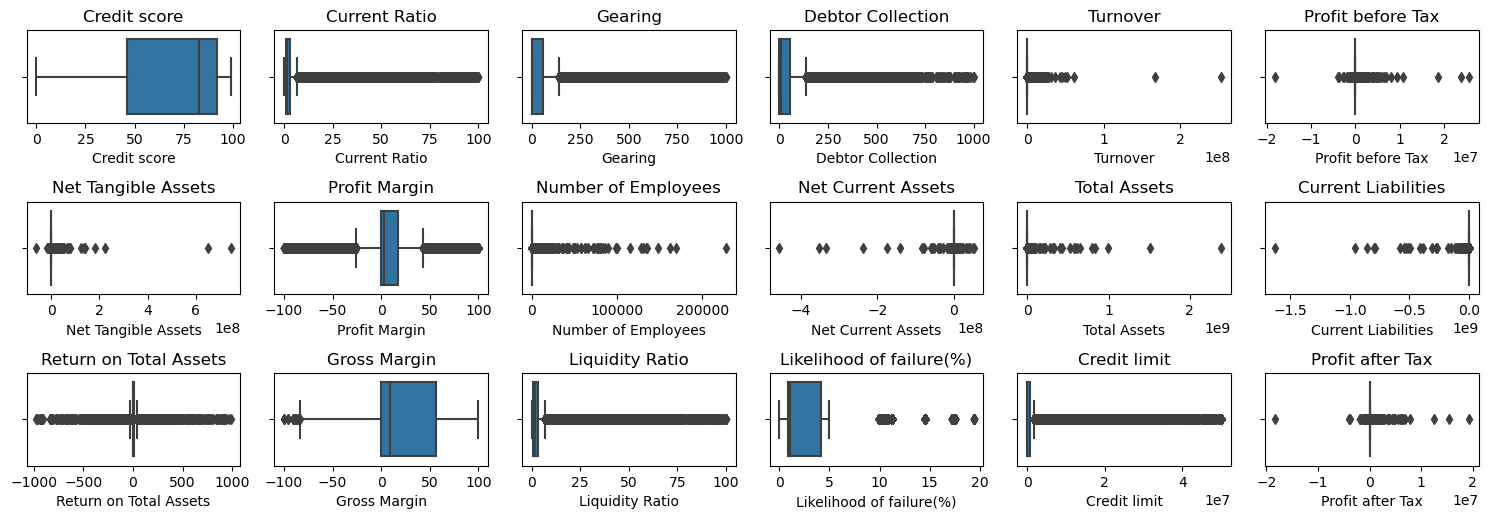

In [121]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols.columns):
    plt.subplot(6, 6, i+1)
    sns.boxplot(x=df2[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

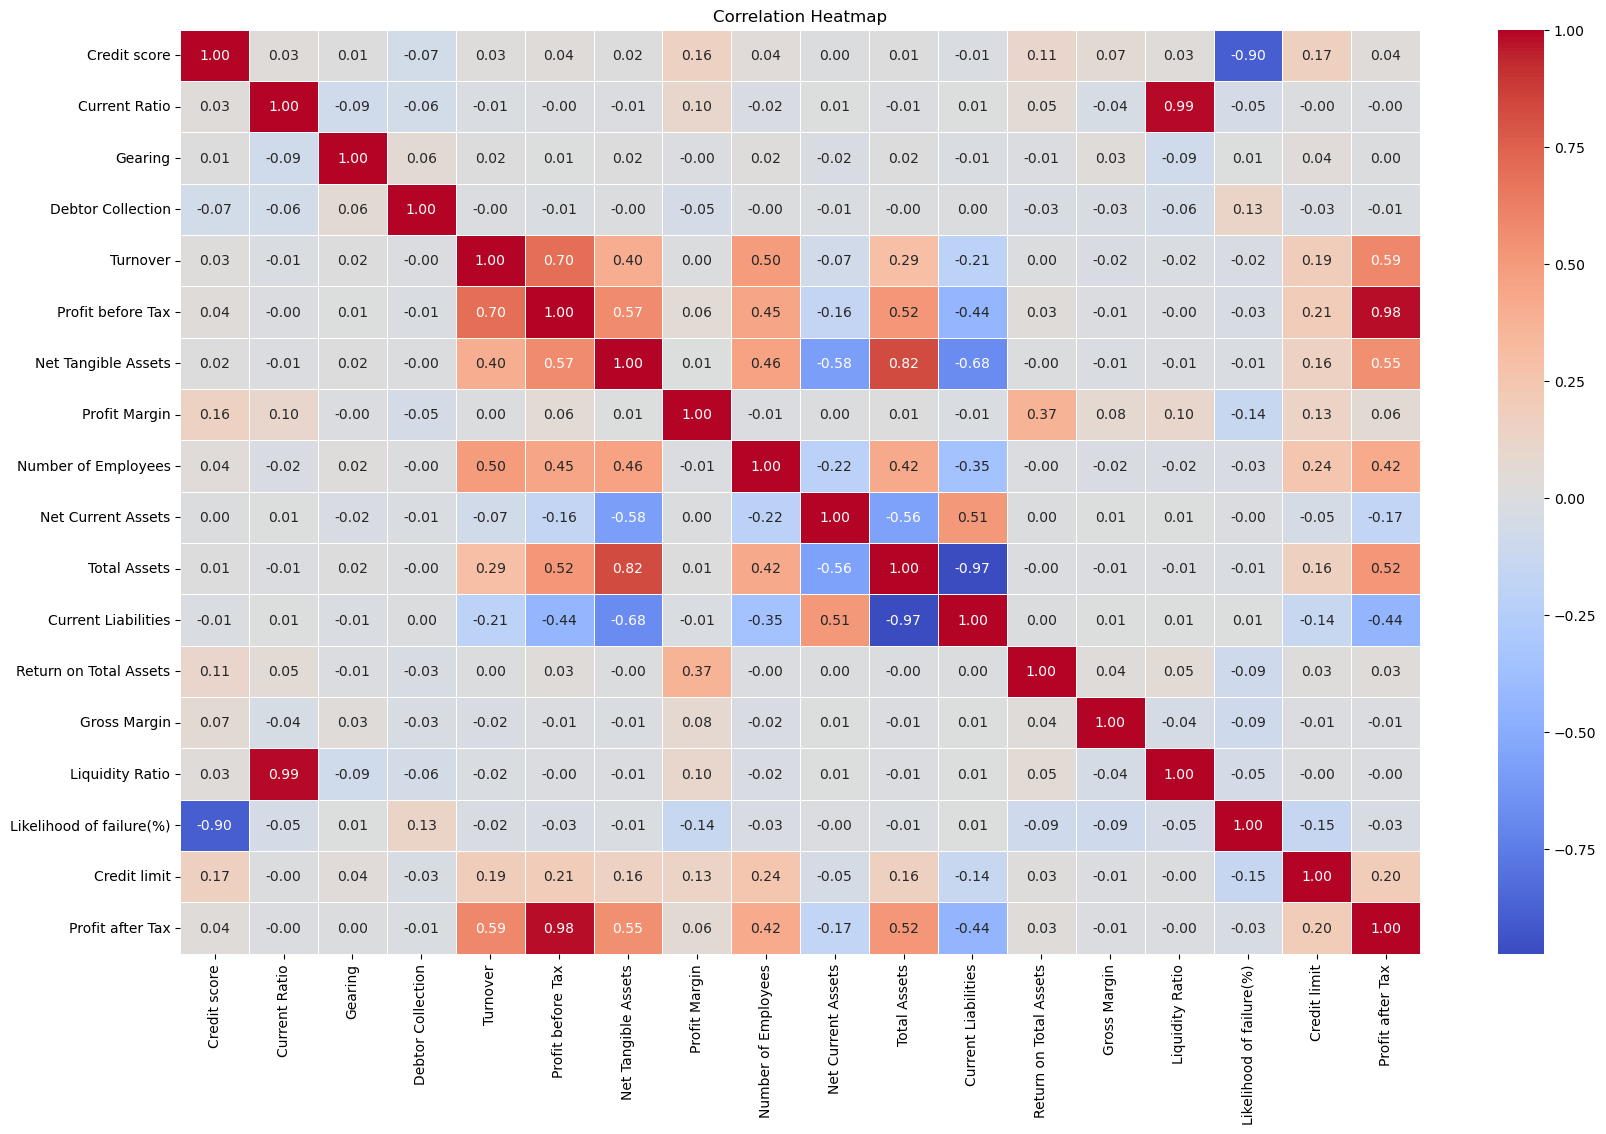

In [122]:
correlation_matrix = num_cols.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

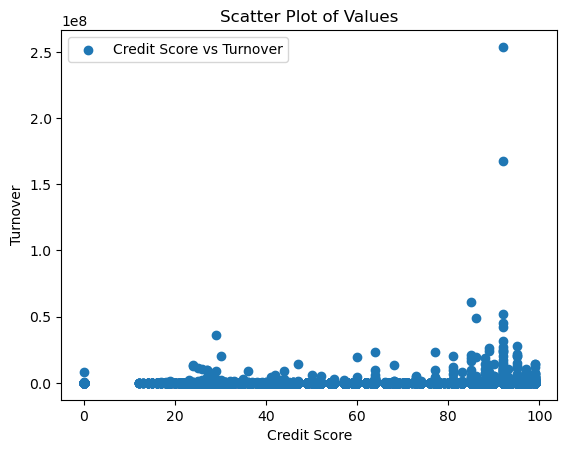

In [123]:
plt.scatter(df2["Credit score"], df2["Turnover"], label='Credit Score vs Turnover')
plt.xlabel('Credit Score')
plt.ylabel('Turnover')
plt.title('Scatter Plot of Values')
plt.legend()
plt.show()

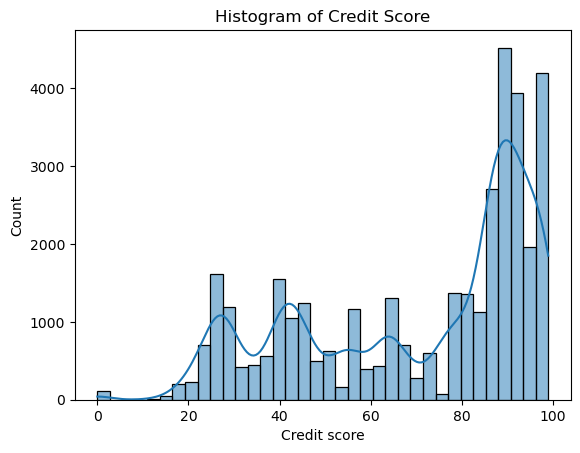

In [124]:
sns.histplot(data=df2, x=df2['Credit score'], kde=True)
plt.title('Histogram of Credit Score')
plt.show()

In [125]:
df2["Credit limit"]

0               0
1        50000000
2        19458000
3        50000000
4        50000000
           ...   
41661       50681
41662        1274
41663        2895
41664           0
41665           0
Name: Credit limit, Length: 36804, dtype: int64

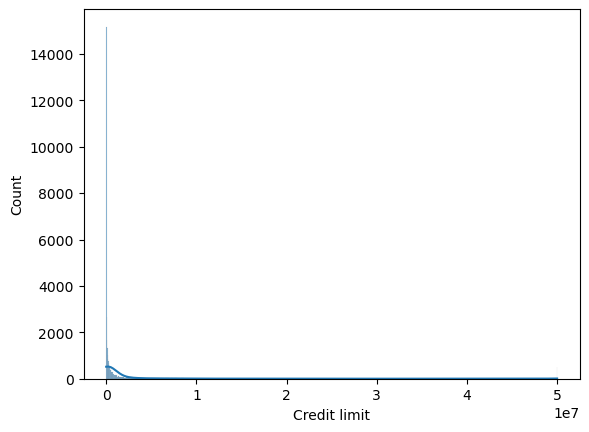

In [126]:
sns.histplot(df2, x=df2['Credit limit'], kde=True)
plt.show()

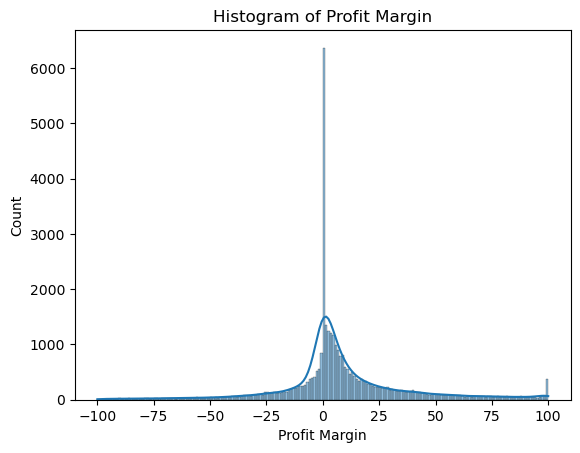

In [127]:
sns.histplot(data=df2, x=df2['Profit Margin'], kde=True)
plt.title('Histogram of Profit Margin')
plt.show()

In [128]:
df2["Credit limit"].describe()

count    3.680400e+04
mean     2.109125e+06
std      7.343617e+06
min      0.000000e+00
25%      3.926000e+03
50%      9.380900e+04
75%      6.753290e+05
max      5.000000e+07
Name: Credit limit, dtype: float64

In [129]:
correlation_matrix = df2.corr()
credit_score_correlation = correlation_matrix['Credit score'].sort_values(ascending=False)
print(credit_score_correlation)

Credit score                1.000000
Credit limit                0.167110
Profit Margin               0.157684
Return on Total Assets      0.106092
Gross Margin                0.067037
Number of Employees         0.037856
Profit after Tax            0.035338
Profit before Tax           0.035062
Current Ratio               0.034136
Liquidity Ratio             0.032393
Turnover                    0.026124
Net Tangible Assets         0.016101
Total Assets                0.014986
Gearing                     0.014108
Net Current Assets          0.002787
Current Liabilities        -0.012343
Debtor Collection          -0.070335
ID                         -0.352882
Likelihood of failure(%)   -0.895359
Name: Credit score, dtype: float64


C:\Users\jeeva\AppData\Local\Temp\ipykernel_16072\336339541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


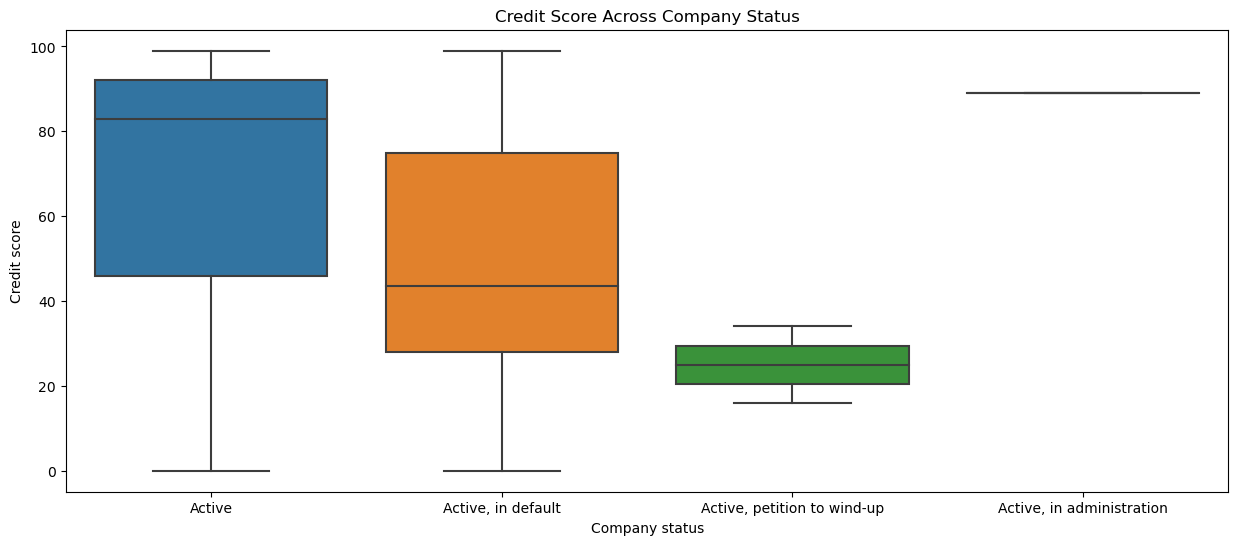

In [131]:
plt.figure(figsize = (15,6))
sns.boxplot(data=df2, x='Company status', y='Credit score')
plt.title('Credit Score Across Company Status')
plt.show()

In [132]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [133]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(num_cols)
standardized_df = pd.DataFrame(standardized_data, columns=num_cols.columns)
standardized_df

,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,Number of Employees,Net Current Assets,Total Assets,Current Liabilities,Return on Total Assets,Gross Margin,Liquidity Ratio,Likelihood of failure(%),Credit limit,Profit after Tax
0,0.841728,-0.292905,0.003512,-0.046877,136.598850,89.896356,39.144979,0.045270,30.183301,7.511033,16.784536,-5.133220,0.023410,-0.782614,-0.311827,-0.647556,-0.287209,68.464922
1,0.841728,-0.313410,0.400181,-0.021678,90.022428,65.423123,23.652458,0.080396,23.948886,3.504032,11.570241,-4.635676,0.030249,-0.782614,-0.332599,-0.647556,6.521517,55.358082
2,0.564313,-0.333916,-0.451786,-0.251625,32.761901,0.459221,0.006414,-0.284912,0.068051,0.066563,0.630454,-0.824113,-0.083848,-0.745593,-0.338065,-0.647556,2.362475,0.559709
3,0.841728,-0.361975,0.632610,-0.237391,27.821052,28.434092,1.841628,0.231604,38.657263,-1.198835,3.414503,-1.382011,0.091495,0.375730,-0.376330,-0.647556,6.521517,27.513270
4,0.603944,-0.357658,2.071697,-0.524854,26.418281,83.613874,130.673298,1.328866,68.785828,-82.816057,125.742130,-112.537031,-0.085869,-0.782614,-0.347905,-0.647556,6.521517,85.638482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36799,0.722836,-0.443996,-0.451786,0.615547,-0.055969,-0.040319,-0.033338,-0.292606,-0.078730,0.010353,-0.031308,0.026167,-0.573816,-0.782614,-0.435367,-0.647556,-0.280308,-0.039876
36800,-1.298333,0.095612,-0.451786,-0.524854,-0.055969,-0.038788,-0.033539,0.854167,-0.080243,0.010068,-0.031367,0.026166,0.773595,-0.782614,0.111272,0.391279,-0.287036,-0.037988
36801,0.405790,3.805955,-0.451786,-0.524854,-0.055969,-0.038985,-0.033523,-0.209643,-0.080546,0.010091,-0.031364,0.026167,-0.063174,-0.782614,3.802181,-0.387848,-0.286815,-0.038188
36802,-2.209840,-0.443996,-0.451786,-0.524854,-0.055969,-0.038848,-0.033554,0.530006,-0.080848,0.010048,-0.031373,0.026168,-0.101414,-0.782614,-0.435367,4.056057,-0.287209,-0.038014


In [134]:
# Feature importance ranking
from sklearn.ensemble import RandomForestRegressor

X = num_cols.drop(columns=['Credit score'])
y = num_cols['Credit score']

In [135]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X, y)

RandomForestRegressor(random_state=42)

In [136]:
feature_importances = rf_regressor.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Likelihood of failure(%): 0.9554355714258963
Credit limit: 0.0059646646778660425
Return on Total Assets: 0.005489483206831458
Number of Employees: 0.0032288764939938912
Turnover: 0.002871074973773995
Profit Margin: 0.002673648333622262
Net Tangible Assets: 0.002512754731704413
Debtor Collection: 0.0024765846727095196
Current Ratio: 0.0024521343974156003
Current Liabilities: 0.0024310647401867983
Net Current Assets: 0.002397634636771729
Gearing: 0.0021765476054107264
Total Assets: 0.0021632263875858504
Gross Margin: 0.0019835446939527163
Profit after Tax: 0.0019760849132607543
Liquidity Ratio: 0.001934958192574942
Profit before Tax: 0.0018321459164430765


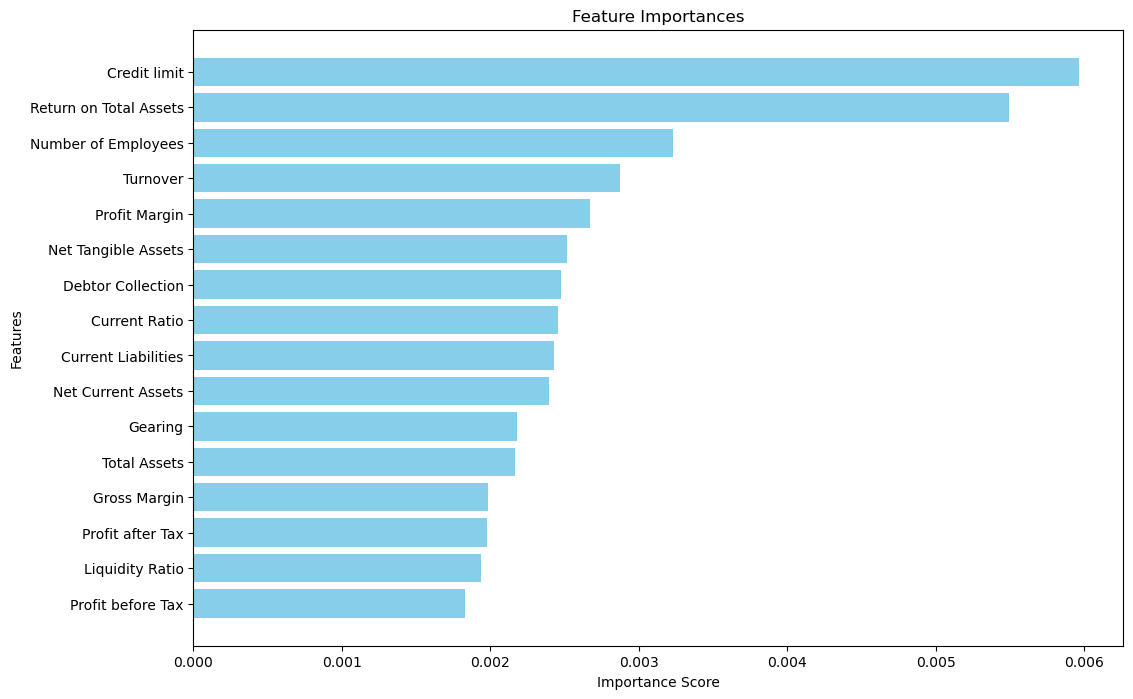

In [137]:
import matplotlib.pyplot as plt

features = [x[0] for x in sorted_feature_importance if x[0] !='Likelihood of failure(%)']
importances = [x[1] for x in sorted_feature_importance if x[0] !='Likelihood of failure(%)']

plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### Model Training

In [138]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = standardized_df[['Profit Margin', 'Return on Total Assets', 'Credit limit', 'Likelihood of failure(%)', 'Current Ratio', 'Number of Employees', 'Turnover', 'Net Tangible Assets']]
y = standardized_df['Credit score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse)

accuracyL = r2_score(y_test, y_pred_lr)
print("R-squared (Accuracy):", accuracyL)

Linear Regression Mean Squared Error: 0.19426732404539743
R-squared (Accuracy): 0.8050744657469566


In [139]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

X = df2[['Profit Margin', 'Return on Total Assets', 'Credit limit', 'Likelihood of failure(%)', 'Current Ratio', 'Number of Employees', 'Turnover', 'Profit Margin']]
y = df2['Credit score']

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

accuracyR = r2_score(y_test, y_pred_rf)
print("R-squared (Accuracy):", accuracyR)

Random Forest Mean Squared Error: 0.03550800004258044
R-squared (Accuracy): 0.9643716929104369


In [140]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)

accuracyG = r2_score(y_test, y_pred_gb)
print("R-squared (Accuracy):", accuracyG)

Gradient Boosting Mean Squared Error: 0.03713272754701022
R-squared (Accuracy): 0.9627414605572977
